In [1]:
# for exporatory data analysis
import pandas as pd
import numpy as np

# for data gathering through sql
import sqlalchemy as sa
import pymysql

# for visualition purpose
import matplotlib.pyplot as plt
import seaborn as sns

# to train data 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# to create instance of model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# for ploting tree
from sklearn.tree import plot_tree

# for model evaluation mse, r2, mae
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# to get path 
import os

# for creating pickle file of model
import pickle

# for creating json file of model data
import json

# to remove warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("clean csv project group.csv")
df

,Unnamed: 0,store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,avg_cars_at home(approx),avg. yearly_income,...,store_city_Portland,store_city_Salem,store_city_San Francisco,store_city_Seattle,store_city_Spokane,store_city_Tacoma,store_city_Vancouver,store_city_Victoria,houseowner_N,houseowner_Y
0,0,2.7232,4.0,1,1,1.0,0,0,1.0,20,...,0,1,0,0,0,0,0,0,0,1
1,1,2.5944,3.0,1,0,0.0,3,2,4.0,60,...,0,1,0,0,0,0,0,0,0,1
2,2,1.3616,2.0,0,1,4.0,0,0,1.0,20,...,0,1,0,0,0,0,0,0,1,0
3,3,1.1776,2.0,1,1,2.0,1,1,2.0,40,...,0,1,0,0,0,0,0,0,0,1
4,4,1.4280,3.0,1,0,0.0,0,1,2.0,40,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,60423,1.3248,1.0,1,1,1.0,0,0,1.0,20,...,0,0,1,0,0,0,0,0,0,1
60424,60424,0.4960,1.0,0,1,2.0,1,1,2.0,40,...,0,0,1,0,0,0,0,0,1,0
60425,60425,2.5392,2.0,1,0,1.0,1,1,3.0,40,...,0,0,1,0,0,0,0,0,0,1
60426,60426,2.5668,3.0,0,0,2.0,3,1,4.0,80,...,0,0,0,0,0,0,0,1,1,0


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 163 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    Unnamed: 0                              int64  
 1    store_cost(in millions)                 float64
 2    unit_sales(in millions)                 float64
 3    marital_status                          int64  
 4    gender                                  int64  
 5    total_children                          float64
 6    education                               int64  
 7    member_card                             int64  
 8    avg_cars_at home(approx)                float64
 9    avg. yearly_income                      int64  
 10   low_fat                                 float64
 11   store_type                              int64  
 12   store_sqft                              float64
 13   grocery_sqft                            float64
 14   frozen_sqft         

## Train Test Split

In [4]:
df

,Unnamed: 0,store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,avg_cars_at home(approx),avg. yearly_income,...,store_city_Portland,store_city_Salem,store_city_San Francisco,store_city_Seattle,store_city_Spokane,store_city_Tacoma,store_city_Vancouver,store_city_Victoria,houseowner_N,houseowner_Y
0,0,2.7232,4.0,1,1,1.0,0,0,1.0,20,...,0,1,0,0,0,0,0,0,0,1
1,1,2.5944,3.0,1,0,0.0,3,2,4.0,60,...,0,1,0,0,0,0,0,0,0,1
2,2,1.3616,2.0,0,1,4.0,0,0,1.0,20,...,0,1,0,0,0,0,0,0,1,0
3,3,1.1776,2.0,1,1,2.0,1,1,2.0,40,...,0,1,0,0,0,0,0,0,0,1
4,4,1.4280,3.0,1,0,0.0,0,1,2.0,40,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,60423,1.3248,1.0,1,1,1.0,0,0,1.0,20,...,0,0,1,0,0,0,0,0,0,1
60424,60424,0.4960,1.0,0,1,2.0,1,1,2.0,40,...,0,0,1,0,0,0,0,0,1,0
60425,60425,2.5392,2.0,1,0,1.0,1,1,3.0,40,...,0,0,1,0,0,0,0,0,0,1
60426,60426,2.5668,3.0,0,0,2.0,3,1,4.0,80,...,0,0,0,0,0,0,0,1,1,0


In [5]:
x=df.drop("cost",axis=1)
y=df["cost"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48342, 162)
(12086, 162)
(48342,)
(12086,)


## Normalization

In [7]:
x=df.drop("cost",axis=1)
normal_scalar=MinMaxScaler()
array_normal=normal_scalar.fit_transform(x)
x_normal_df=pd.DataFrame(array_normal, columns=x.columns)
#x_normal_df

In [8]:
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(x_normal_df,y,test_size=0.2,random_state=35)
print(x_train_n.shape)
print(x_test_n.shape)
print(y_train_n.shape)
print(y_test_n.shape)

(48342, 162)
(12086, 162)
(48342,)
(12086,)


## Standardization

In [9]:
std_scalar=StandardScaler()
array_std=std_scalar.fit_transform(x)
x_std_df=pd.DataFrame(array_std, columns=x.columns)
#x_std_df

In [10]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_std_df,y,test_size=0.2,random_state=35)
print(x_train_s.shape)
print(x_test_s.shape)
print(y_train_s.shape)
print(y_test_s.shape)

(48342, 162)
(12086, 162)
(48342,)
(12086,)


# 5. Model Train

In [11]:
training_accuracy_list=[]
testing_accuracy_list=[]
model_info_list=[]


**************  Testing Data Evaluation On Linear_Regression  ****************
Mean Sq Error--->:      592.3686005017815
Root Mean Sq Error--->:  24.338623636142238
Mean Absolute Error--->:  19.950823976626
R Square--->:             0.3393221446204603
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Linear_Regression  ************
Mean Sq Error--->:       578.8346866976931
Root Mean Sq Error--->:  24.058983492610263
Mean Absolute Error--->:  19.71376746314567
R Square--->:             0.35804217737071564
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322


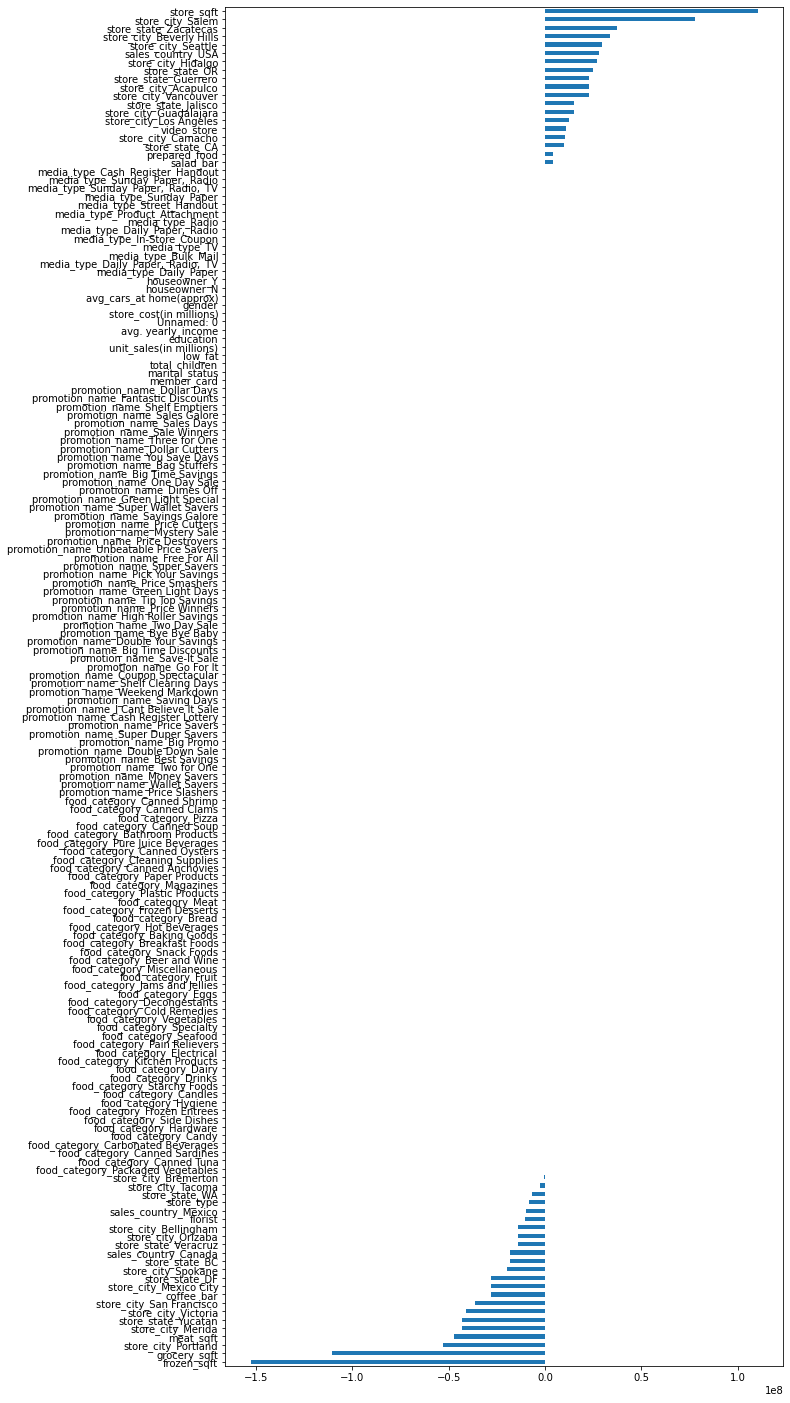

In [12]:
class AllModelMedical():
    def __init__(self, x_train, x_test, y_train, y_test, model,model_name):
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
        self.model=model
        self.model_name=model_name
        
        
    def testing_data_evaluation(self):
        print(f"**************  Testing Data Evaluation On {self.model_name}  ****************")
        y_pred=self.model.predict(self.x_test)

        mse=mean_squared_error(self.y_test,y_pred)
        print("Mean Sq Error--->:     ",mse)
        #print("*"*80)

        rmse=np.sqrt(mse)
        print("Root Mean Sq Error--->: ",rmse)
        #print("*"*80)

        mae=mean_absolute_error(self.y_test,y_pred)
        print("Mean Absolute Error--->: ",mae)
        #print("*"*80)

        r_squared_value=r2_score(self.y_test,y_pred)
        print("R Square--->:            ",r_squared_value)
        print("-"*80)
        print()
        
        testing_accuracy_list.append(r_squared_value)
        
        
    def training_data_evaluation(self):
        print(f"**************  Training Data Evaluation On {self.model_name}  ************")
        y_pred_train=self.model.predict(self.x_train)

        mse=mean_squared_error(self.y_train,y_pred_train)
        print("Mean Sq Error--->:      ",mse)
        #print("*"*80)

        rmse=np.sqrt(mse)
        print("Root Mean Sq Error--->: ",rmse)
        #print("*"*80)

        mae=mean_absolute_error(self.y_train,y_pred_train)
        print("Mean Absolute Error--->: ",mae)
        #print("*"*80)

        r_squared_value=r2_score(self.y_train,y_pred_train)
        print("R Square--->:            ",r_squared_value)
        print("-"*80)
        print()
        
        training_accuracy_list.append(r_squared_value)
        
    def model_eva_df(self):
        dict01={"Model Name":model_info_list,"Training Accuracy":training_accuracy_list,"Testing Accuracy":testing_accuracy_list}
        self.evaluation_df=pd.DataFrame(dict01)
        
        
    def model_evaluation(self):
        self.model.fit(x_train, y_train)
        self.testing_data_evaluation()
        self.training_data_evaluation()
        
        model_info_list.append(self.model_name)
        
        self.model_eva_df()
        display(self.evaluation_df)
        
        

if __name__=="__main__":
    Linear_Regression=LinearRegression()
    model_name="Linear_Regression"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Linear_Regression,model_name)
    obj.model_evaluation()
    
    s2 = pd.Series(Linear_Regression.coef_, index=x.columns)
    plt.figure(figsize=(10,25))
    s2.sort_values().plot(kind = "barh")
 

## Model Evaluation Ridge Regression

**************  Testing Data Evaluation On Ridge_Regularization_Regression  ****************
Mean Sq Error--->:      592.360201973962
Root Mean Sq Error--->:  24.338451100552025
Mean Absolute Error--->:  19.95266738212334
R Square--->:             0.3393315116283393
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Ridge_Regularization_Regression  ************
Mean Sq Error--->:       578.8353780354558
Root Mean Sq Error--->:  24.05899786016566
Mean Absolute Error--->:  19.715866089010262
R Square--->:             0.3580414106411208
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332


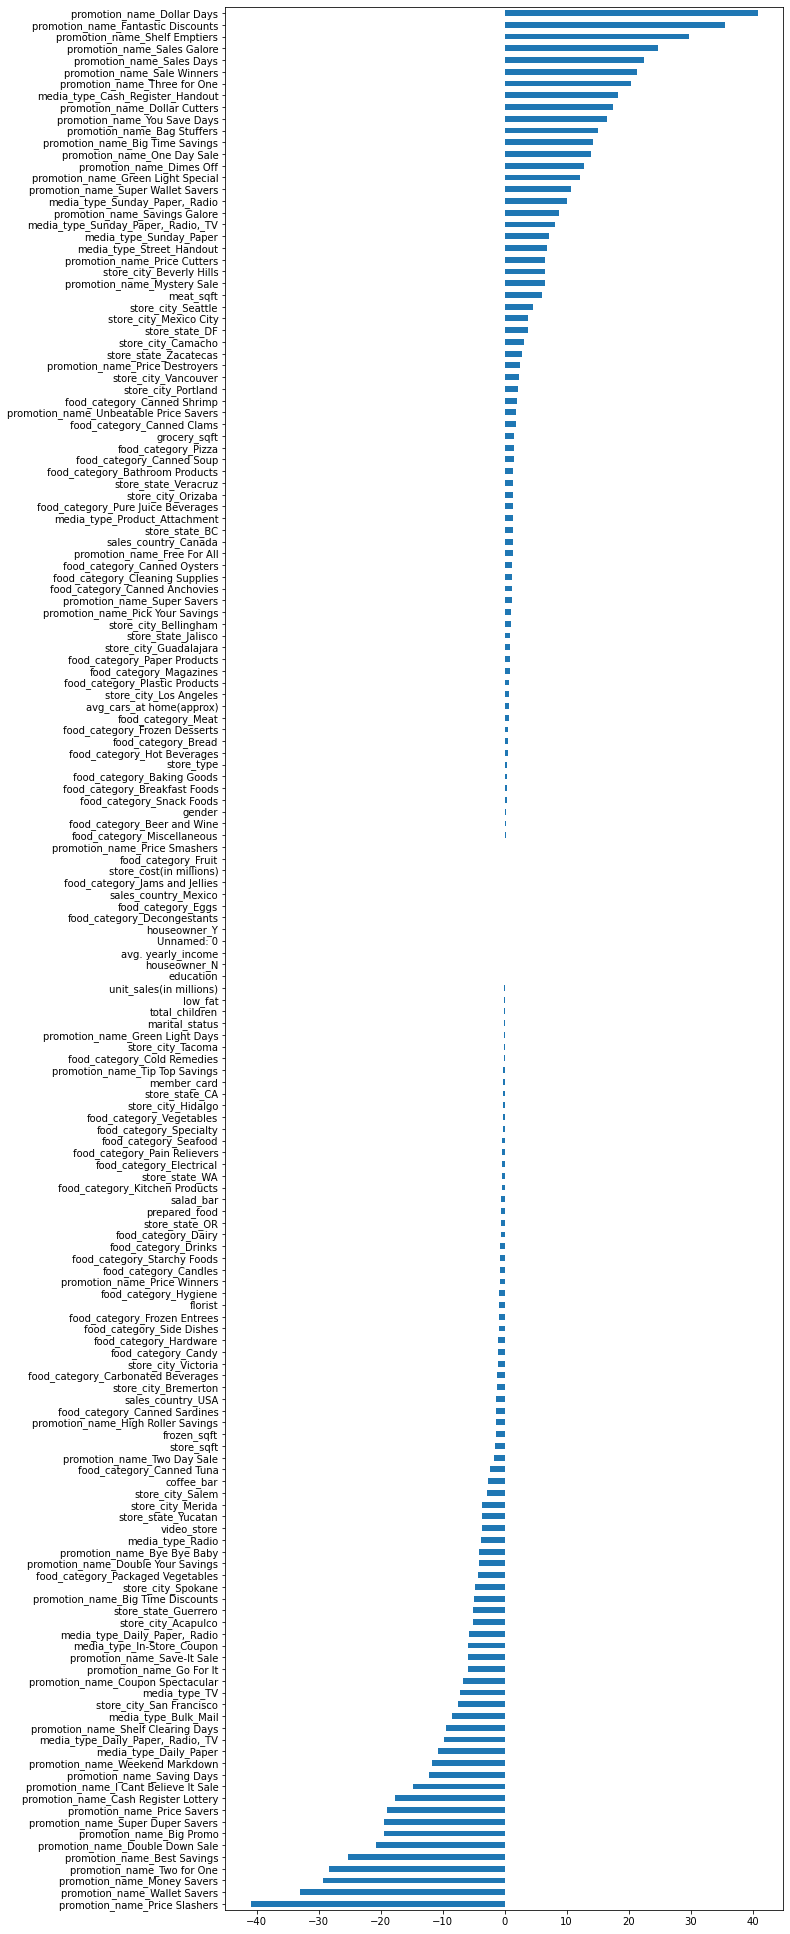

In [13]:
if __name__=="__main__":
    Ridge_Regularization_Regression=Ridge(alpha=1.0)
    model_name="Ridge_Regularization_Regression"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Ridge_Regularization_Regression,model_name)
    obj.model_evaluation()
    
    s2 = pd.Series(Ridge_Regularization_Regression.coef_, index=x.columns)
    plt.figure(figsize=(10,35))
    s2.sort_values().plot(kind = "barh")

## Model Evaluation On Lasso Regularization

**************  Testing Data Evaluation On Lasso_Regularization_Regression  ****************
Mean Sq Error--->:      883.9489613059728
Root Mean Sq Error--->:  29.73127917372498
Mean Absolute Error--->:  25.680334857181204
R Square--->:             0.014118061750902244
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Lasso_Regularization_Regression  ************
Mean Sq Error--->:       887.4226452066282
Root Mean Sq Error--->:  29.789639897229847
Mean Absolute Error--->:  25.794873119282407
R Square--->:             0.01580205512753463
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332
2,Lasso_Regularization_Regression,0.015802,0.014118


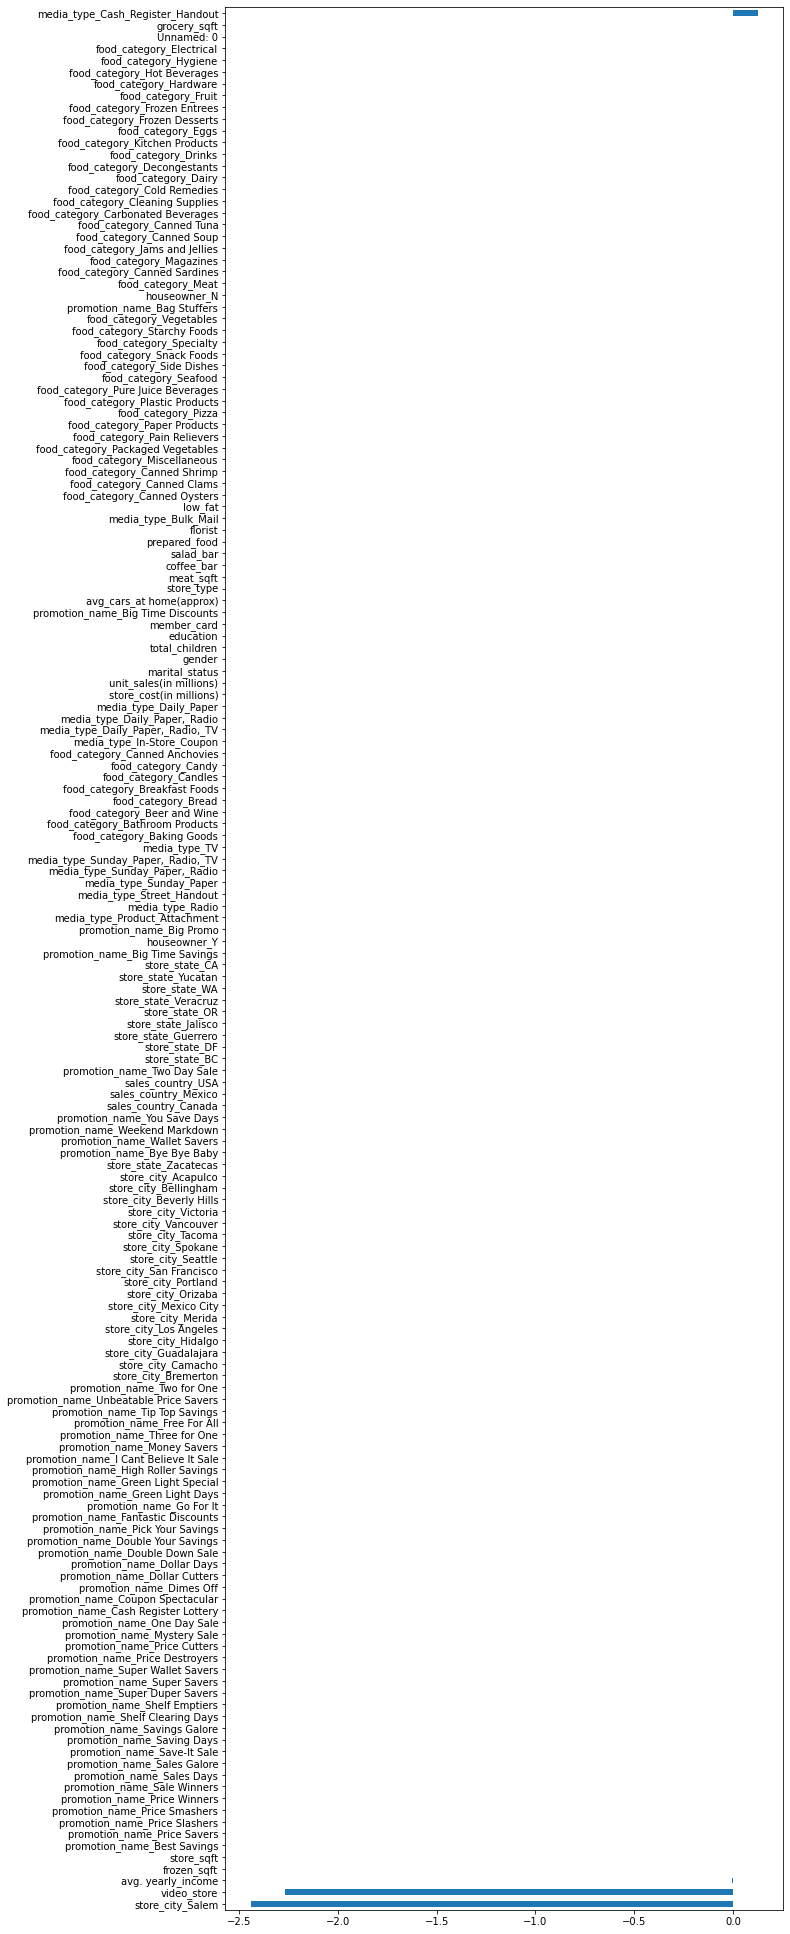

In [14]:
if __name__=="__main__":
    Lasso_Regularization_Regression=Lasso(alpha=1.0)
    model_name="Lasso_Regularization_Regression"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Lasso_Regularization_Regression,model_name)
    obj.model_evaluation()
    
    s2 = pd.Series(Lasso_Regularization_Regression.coef_, index=x.columns)
    plt.figure(figsize=(10,35))
    s2.sort_values().plot(kind = "barh")

## Model Evaluation On Ridge Regularization With Hyperparameter Tuning

In [15]:
model_ridge_hyper_random=Ridge()
h_parameters={"alpha":np.arange(0.01,3,0.01)}
model_ridge_hyper_random=RandomizedSearchCV(model_ridge_hyper_random,h_parameters)
model_ridge_hyper_random.fit(x_train, y_train)
model_ridge_hyper_random.best_estimator_

Ridge(alpha=2.8499999999999996)

**************  Testing Data Evaluation On Ridge_Regularization_With_Hyper_random  ****************
Mean Sq Error--->:      592.3490375843534
Root Mean Sq Error--->:  24.33822174244358
Mean Absolute Error--->:  19.956083977329207
R Square--->:             0.3393439634446188
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Ridge_Regularization_With_Hyper_random  ************
Mean Sq Error--->:       578.8405180345866
Root Mean Sq Error--->:  24.059104680652325
Mean Absolute Error--->:  19.719751555053673
R Square--->:             0.35803571011431035
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332
2,Lasso_Regularization_Regression,0.015802,0.014118
3,Ridge_Regularization_With_Hyper_random,0.358036,0.339344


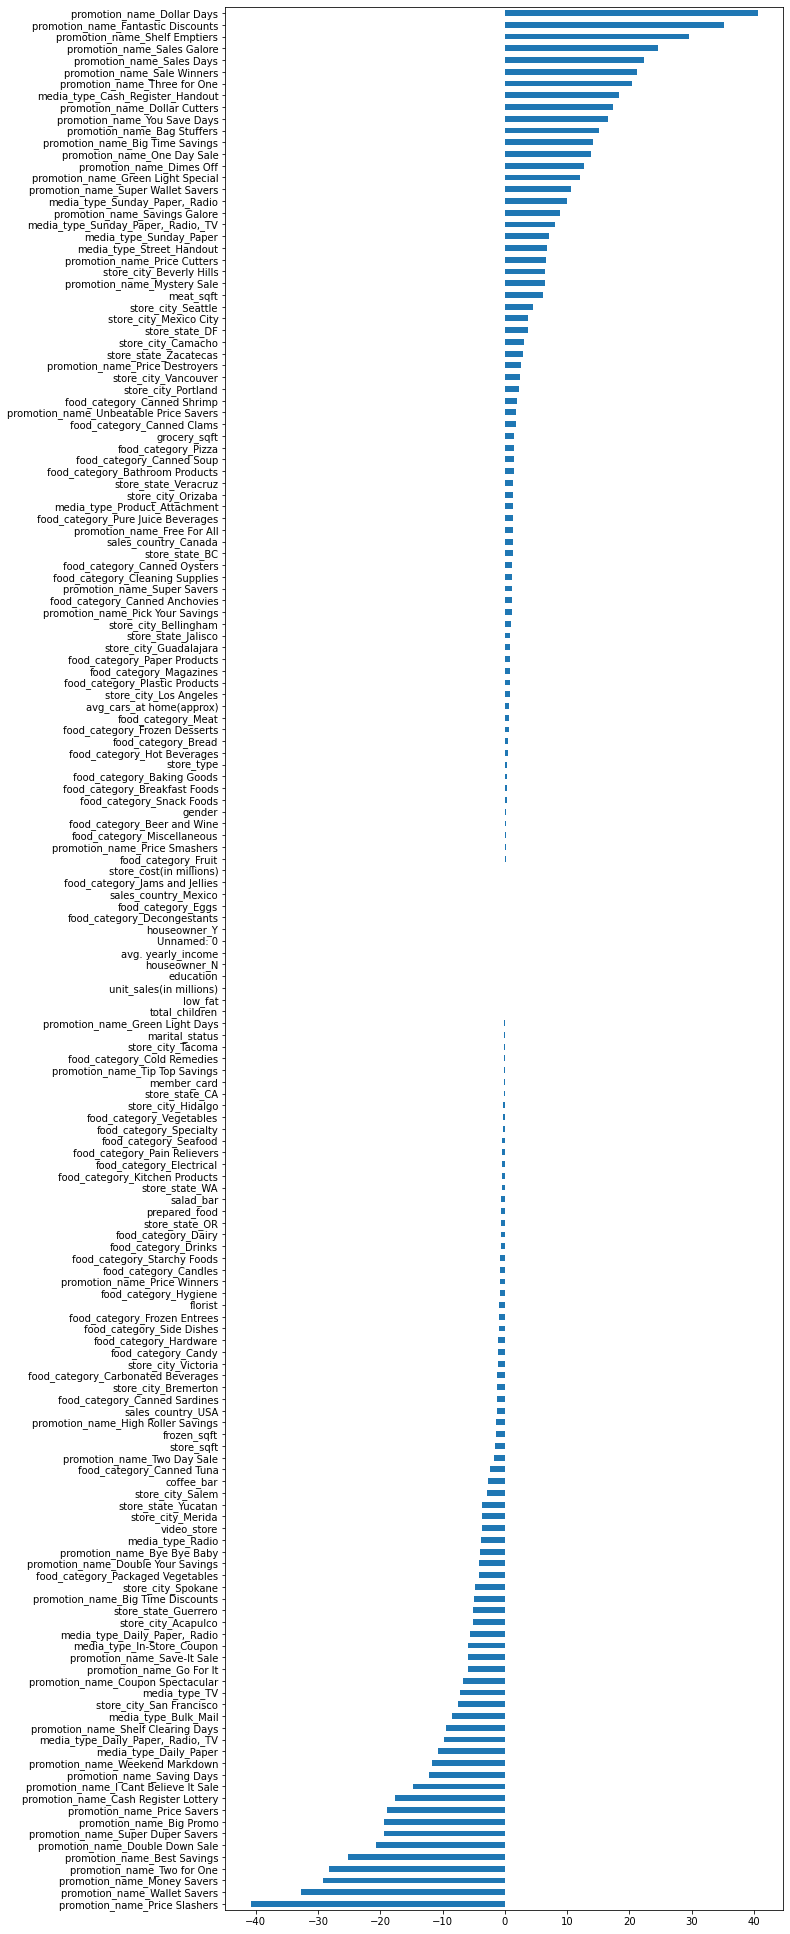

In [16]:
if __name__=="__main__":
    Ridge_Regularization_With_Hyper_random=model_ridge_hyper_random.best_estimator_
    model_name="Ridge_Regularization_With_Hyper_random"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Ridge_Regularization_With_Hyper_random,model_name)
    obj.model_evaluation()
    
    s2 = pd.Series(Ridge_Regularization_With_Hyper_random.coef_, index=x.columns)
    plt.figure(figsize=(10,35))
    s2.sort_values().plot(kind = "barh")

## Evaluation With Lasso Regularization Model With Hyperparameter Tuning

In [17]:
model_lasso_hyper_random=Lasso()
h_parameters={"alpha":np.arange(0.01,1,0.01)}
model_lasso_hyper_random=RandomizedSearchCV(model_lasso_hyper_random,h_parameters)
model_lasso_hyper_random.fit(x_train, y_train)
model_lasso_hyper_random.best_estimator_

Lasso(alpha=0.26)

**************  Testing Data Evaluation On Lasso_Regularization_With_Hyper_random  ****************
Mean Sq Error--->:      715.7416259233437
Root Mean Sq Error--->:  26.753347938591606
Mean Absolute Error--->:  22.8923338028335
R Square--->:             0.2017223025995326
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Lasso_Regularization_With_Hyper_random  ************
Mean Sq Error--->:       710.795765544386
Root Mean Sq Error--->:  26.660753281638275
Mean Absolute Error--->:  22.850222880121454
R Square--->:             0.2116904662603596
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332
2,Lasso_Regularization_Regression,0.015802,0.014118
3,Ridge_Regularization_With_Hyper_random,0.358036,0.339344
4,Lasso_Regularization_With_Hyper_random,0.211690,0.201722


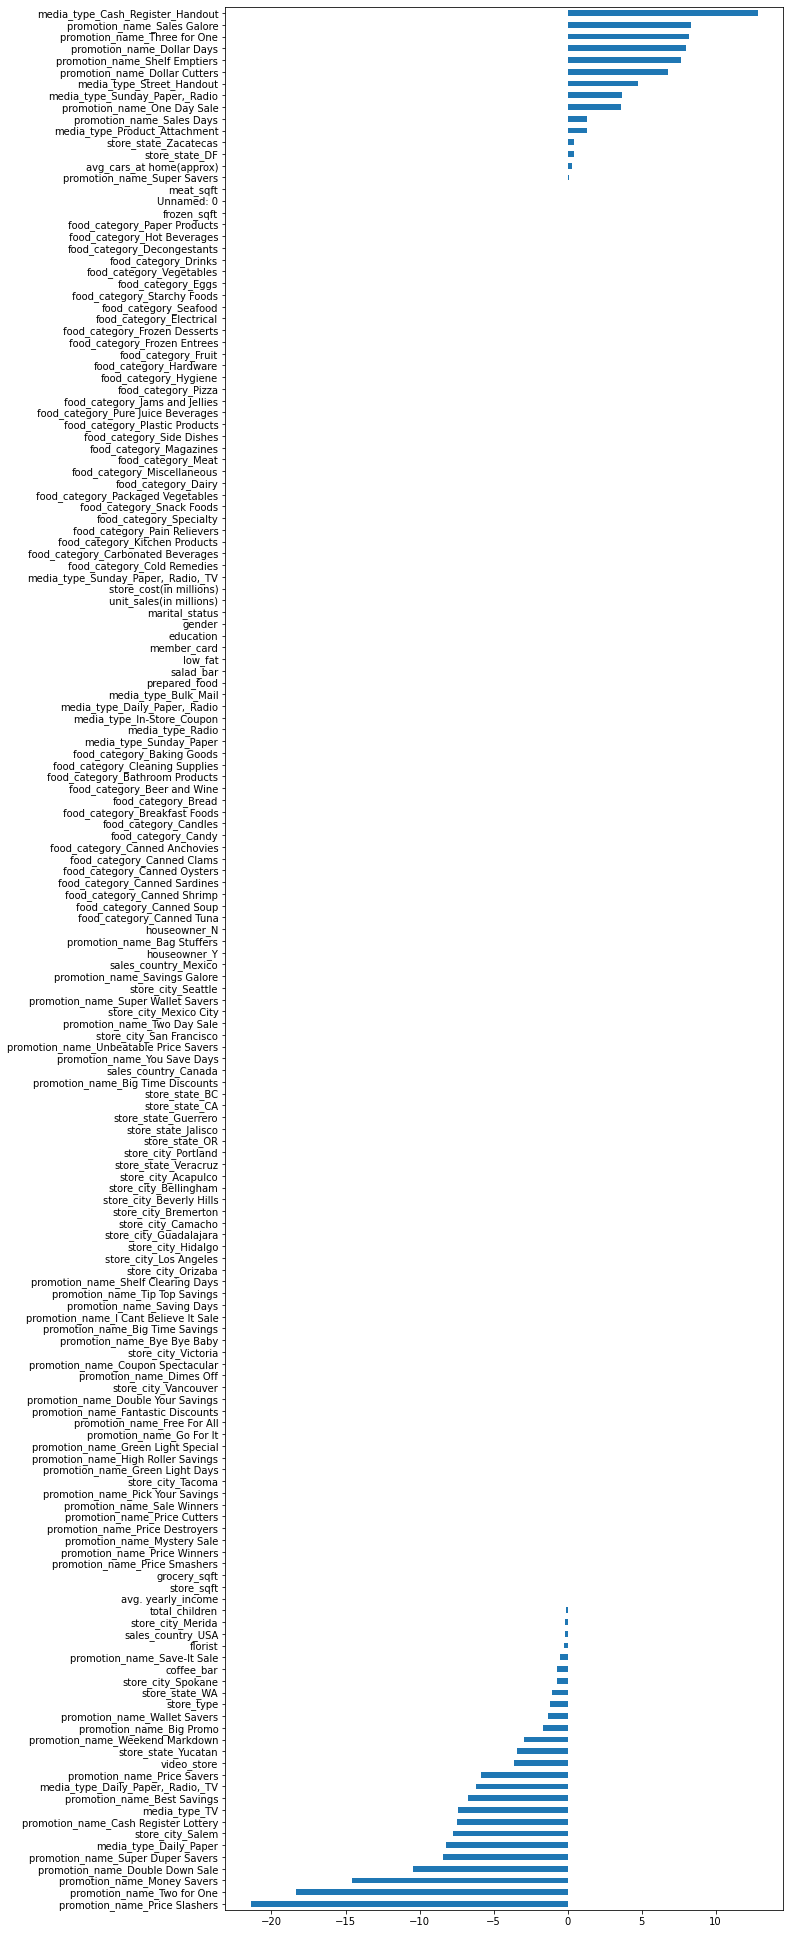

In [18]:
if __name__=="__main__":
    Lasso_Regularization_With_Hyper_random=model_lasso_hyper_random.best_estimator_
    model_name="Lasso_Regularization_With_Hyper_random"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Lasso_Regularization_With_Hyper_random,model_name)
    obj.model_evaluation()
    
    s2 = pd.Series(Lasso_Regularization_With_Hyper_random.coef_, index=x.columns)
    plt.figure(figsize=(10,35))
    s2.sort_values().plot(kind = "barh")

## Evaluation With Decision Tree Regression Model

In [19]:
if __name__=="__main__":
    Decision_Tree_Regression=DecisionTreeRegressor(random_state=1000) 
    model_name="Decision_Tree_Regression"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Decision_Tree_Regression,model_name)
    obj.model_evaluation()

**************  Testing Data Evaluation On Decision_Tree_Regression  ****************
Mean Sq Error--->:      2.476425459209003
Root Mean Sq Error--->:  1.5736662477186842
Mean Absolute Error--->:  0.06943488333631927
R Square--->:             0.997238004411423
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Decision_Tree_Regression  ************
Mean Sq Error--->:       1.1809826817033734e-25
Root Mean Sq Error--->:  3.436542858314695e-13
Mean Absolute Error--->:  2.2711116472251972e-13
R Square--->:             1.0
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332
2,Lasso_Regularization_Regression,0.015802,0.014118
3,Ridge_Regularization_With_Hyper_random,0.358036,0.339344
4,Lasso_Regularization_With_Hyper_random,0.211690,0.201722
5,Decision_Tree_Regression,1.000000,0.997238


## Ploting Decision Tree On Model Trained Without Hyperparameter Tuning

In [20]:
# plt.figure(figsize=(200,200))
# plot_tree(Decision_Tree_Regression,feature_names=x.columns,filled=True)
# print()
# plt.savefig("Decision_tree_without_hyperparameter_tuning.png")

## Evaluation With Decision Tree Regression Model With Hyperparameter Tuning

In [22]:
# model_DecisionTree_hyper_random=DecisionTreeRegressor(random_state=1000)
# h_parameters={"criterion":['squared_error', 'absolute_error'],
#                  'max_depth':np.arange(3,20),
#                  'min_samples_split': np.arange(2,10),
#                  'min_samples_leaf':np.arange(2,10)}
# model_DecisionTree_hyper_random=RandomizedSearchCV(model_DecisionTree_hyper_random,h_parameters)
# model_DecisionTree_hyper_random.fit(x_train, y_train)
# model_DecisionTree_hyper_random.best_estimator_

In [23]:
# if __name__=="__main__":
#     Decision_Tree_Regression_Hyper_random=model_DecisionTree_hyper_random.best_estimator_
#     model_name="Decision_Tree_Regression_Hyper_random"
#     obj=AllModelMedical(x_train, x_test, y_train, y_test,Decision_Tree_Regression_Hyper_random,model_name)
#     obj.model_evaluation()

## Evaluation With Decision Tree Regression Model With Prunning

In [25]:
# model_DecisionTree_CCP=DecisionTreeRegressor(random_state=1000)
# result = model_DecisionTree_CCP.cost_complexity_pruning_path(x_train, y_train)
# ccp_alpha_list = result['ccp_alphas']

# train_acc_lst = []
# test_acc_lst = []

# for i in ccp_alpha_list:
#     model_DecisionTree_CCP = DecisionTreeRegressor(ccp_alpha= i,random_state=39)
#     model_DecisionTree_CCP.fit(x_train, y_train)
    
#     training_accuracy = model_DecisionTree_CCP.score(x_train, y_train)
#     train_acc_lst.append(training_accuracy)
    
#     testing_Accuracy = model_DecisionTree_CCP.score(x_test, y_test)
#     test_acc_lst.append(testing_Accuracy)

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(ccp_alpha_list, train_acc_lst, label = "Training Data Accuracy")
# ax.plot(ccp_alpha_list, test_acc_lst, label = "Testing Data Accuracy")
# ax.legend()

In [ ]:
# index_ccp = test_acc_lst.index(max(test_acc_lst))
# best_ccp = ccp_alpha_list[index_ccp]
# model_DecisionTree_CCP = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=1000)
# model_DecisionTree_CCP

In [ ]:
# if __name__=="__main__":
#     Decision_Tree_Regression_CCP=model_DecisionTree_CCP
#     model_name="Decision_Tree_Regression_CCP"
#     obj=AllModelMedical(x_train, x_test, y_train, y_test,Decision_Tree_Regression_CCP,model_name)
#     obj.model_evaluation()

## Evaluation With Random Forest Regression Model

In [26]:
if __name__=="__main__":
    Random_Forest_Regressor=RandomForestRegressor(random_state=1)
    model_name="Random_Forest_Regressor"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,Random_Forest_Regressor,model_name)
    obj.model_evaluation()

**************  Testing Data Evaluation On Random_Forest_Regressor  ****************
Mean Sq Error--->:      1.3365057389235506
Root Mean Sq Error--->:  1.1560734141582665
Mean Absolute Error--->:  0.07694462187671729
R Square--->:             0.998509374493269
--------------------------------------------------------------------------------

**************  Training Data Evaluation On Random_Forest_Regressor  ************
Mean Sq Error--->:       0.12383809423793338
Root Mean Sq Error--->:  0.35190637140855147
Mean Absolute Error--->:  0.022429049274087693
R Square--->:             0.9998626571019973
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332
2,Lasso_Regularization_Regression,0.015802,0.014118
3,Ridge_Regularization_With_Hyper_random,0.358036,0.339344
4,Lasso_Regularization_With_Hyper_random,0.211690,0.201722
5,Decision_Tree_Regression,1.000000,0.997238
6,Random_Forest_Regressor,0.999863,0.998509


## Evaluation With Random Forest Regression Model With Hyperparameter Tuning

In [ ]:
# model_RF_Hyper_random=RandomForestRegressor(random_state=1791095845)
# h_parameters={'n_estimators':np.arange(10,200),
#               "criterion":['squared_error', 'absolute_error'],
#                  'max_depth':np.arange(3,20),
#                  'min_samples_split': np.arange(2,10),
#                  'min_samples_leaf':np.arange(2,10)}
# model_RF_Hyper_random=RandomizedSearchCV(model_RF_Hyper_random,h_parameters)
# model_RF_Hyper_random.fit(x_train, y_train)
# model_RF_Hyper_random.best_estimator_

In [ ]:
# if __name__=="__main__":
#     Random_Forest_Regressor_Hyper_random=model_RF_Hyper_random.best_estimator_
#     Random_Forest_Regressor_Hyper_random
#     model_name="Random_Forest_Regressor_Hyper_random"
#     obj=AllModelMedical(x_train, x_test, y_train, y_test,Random_Forest_Regressor_Hyper_random,model_name)
#     obj.model_evaluation()

## Evaluation With AdaBoost Regression Model

In [27]:
if __name__=="__main__":
    AdaBoost_Regressor=AdaBoostRegressor(random_state=1)
    model_name="AdaBoost_Regressor"
    obj=AllModelMedical(x_train, x_test, y_train, y_test,AdaBoost_Regressor,model_name)
    obj.model_evaluation()

**************  Testing Data Evaluation On AdaBoost_Regressor  ****************
Mean Sq Error--->:      834.5810335084312
Root Mean Sq Error--->:  28.8891161773501
Mean Absolute Error--->:  25.016812735149664
R Square--->:             0.06917887462009076
--------------------------------------------------------------------------------

**************  Training Data Evaluation On AdaBoost_Regressor  ************
Mean Sq Error--->:       839.0424280026297
Root Mean Sq Error--->:  28.966229095321154
Mean Absolute Error--->:  25.141091343393715
R Square--->:             0.06945823643173388
--------------------------------------------------------------------------------



,Model Name,Training Accuracy,Testing Accuracy
0,Linear_Regression,0.358042,0.339322
1,Ridge_Regularization_Regression,0.358041,0.339332
2,Lasso_Regularization_Regression,0.015802,0.014118
3,Ridge_Regularization_With_Hyper_random,0.358036,0.339344
4,Lasso_Regularization_With_Hyper_random,0.211690,0.201722
5,Decision_Tree_Regression,1.000000,0.997238
6,Random_Forest_Regressor,0.999863,0.998509
7,AdaBoost_Regressor,0.069458,0.069179


##   Evaluation DataFrame Analysis

In [ ]:
evaluation_df=obj.evaluation_df
evaluation_df